In [1]:
import numpy as np
from sympy import integrate, exp, symbols, frac, Rational, erf
from sympy.plotting import plot
import matplotlib.pyplot as plt

from sympy import init_printing

init_printing()

The paper writes

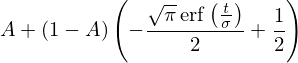

In [2]:
A, t, sigma, x = symbols('A t \sigma, x')

func = A + (1 - A)*( Rational(1, 2) - integrate(exp(-x**2), (x, 0, t/sigma)) ) 
func

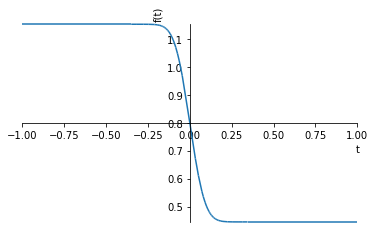

In [3]:
A_val = 0.6
func_subs = func.subs([(A, A_val), (sigma, 0.1)])

plot(func_subs, (t, -1, 1))

In [4]:
negative_limit = func_subs.evalf(subs=dict(t=-1e9))
positive_limit = func_subs.evalf(subs=dict(t=1e9))

print(f"The function for A={A_val} goes from {negative_limit:.3f} to {positive_limit:.3f}")

The function for A=0.6 goes from 1.154 to 0.446
